In [1]:
import os, glob
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image, display

import sys
sys.path.append('..')
import helpers, datasets, surfaces, matrices

sns.set_style('ticks')

/home/asaberi/laminar_organization/env/lib/python3.9/site-packages/nilearn/input_data/__init__.py:27: FutureWarning: The import path 'nilearn.input_data' is deprecated in version 0.9. Importing from 'nilearn.input_data' will be possible at least until release 0.13.0. Please import from 'nilearn.maskers' instead.
  warnings.warn(message, FutureWarning)


In [2]:
ec_maps = surfaces.EffectiveConnectivityMaps('mics')

In [3]:
ec_maps_fsa = helpers.deparcellate(ec_maps.parcellated_data, 'schaefer400', space='fsaverage', downsampled=False)

Afferent

/home/asaberi/laminar_organization/env/lib/python3.9/site-packages/brainspace/plotting/surface_plotting.py:437: RuntimeWarning: Running plot_hemispheres without a display may result in a crash. For a workaround please consult https://github.com/MICA-MNI/BrainSpace/issues/66. To suppress this warning set suppress_warnings=True.
  warnings.warn(


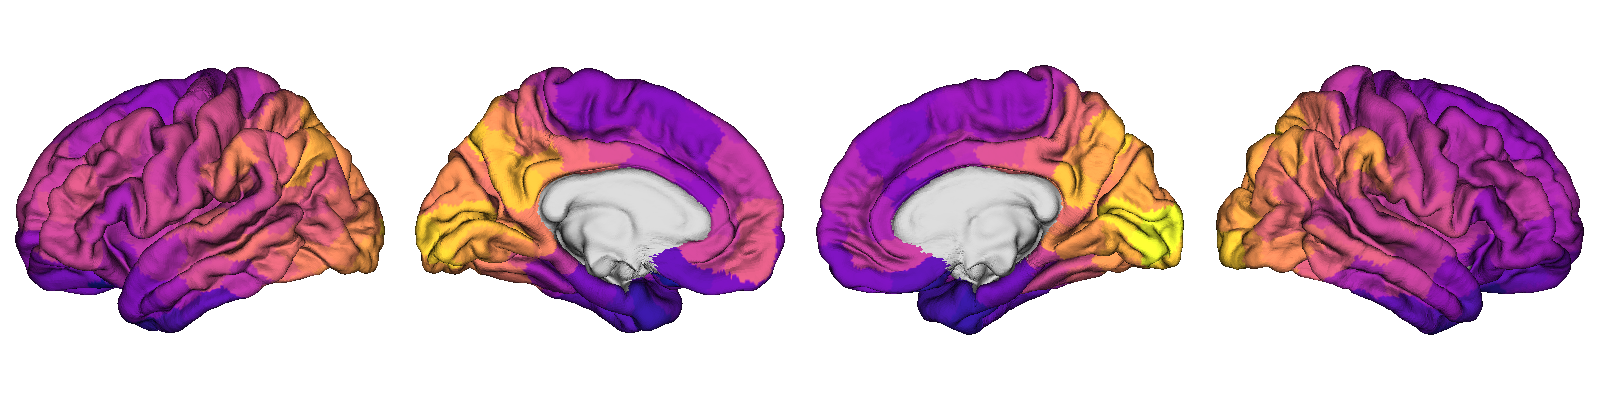

In [4]:
helpers.plot_surface(ec_maps_fsa[:, 0], space='fsaverage', inflate=False, cmap='plasma', plot_downsampled=False)

Efferent

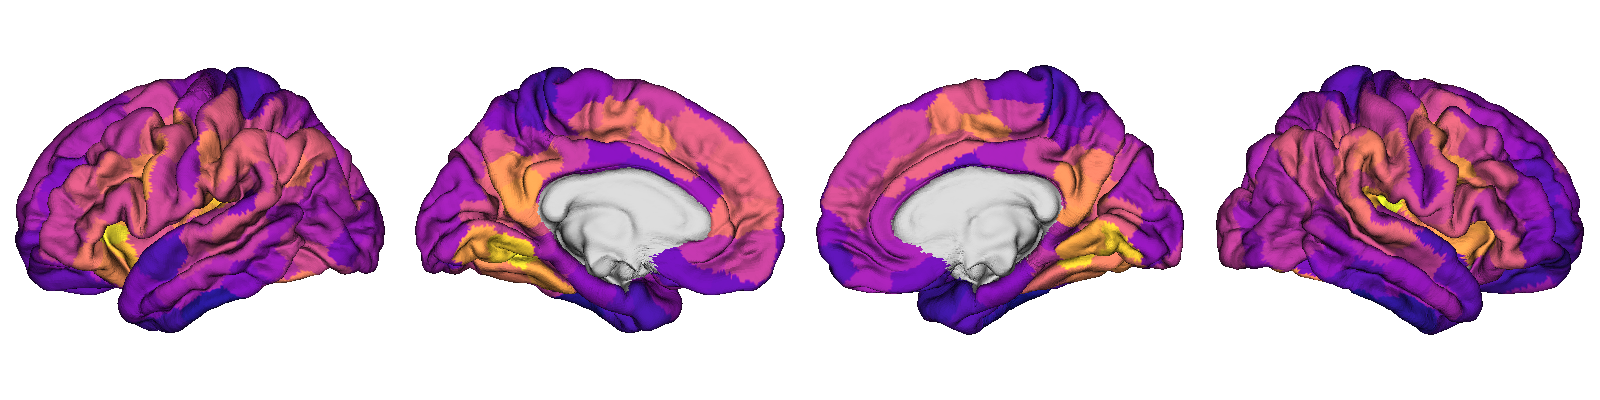

In [5]:
helpers.plot_surface(ec_maps_fsa[:, 1], space='fsaverage', inflate=False, cmap='plasma', plot_downsampled=False)

Correlation of afferent and efferent strength with LTC G1

In [6]:
ltcg = surfaces.MicrostructuralCovarianceGradients(matrices.MicrostructuralCovarianceMatrix('thickness','schaefer400'))

Loading the matrix from /home/asaberi/laminar_organization/code/../output/ltc/parc-schaefer400_curv-smooth-10_exc-adysgranular_metric-parcor/matrix.npz
Loading the matrix from /home/asaberi/laminar_organization/code/../output/ltc/parc-schaefer1000_curv-smooth-10_exc-adysgranular_metric-parcor/matrix.npz
Loading the matrix from /home/asaberi/laminar_organization/code/../output/ltc/parc-schaefer1000_curv-smooth-10_exc-adysgranular_metric-parcor/matrix.npz


Calculating correlations with variogram test (parcellated)
Surrogates already exist in /home/asaberi/laminar_organization/code/../output/ltc/parc-schaefer400_curv-smooth-10_exc-adysgranular_metric-parcor/gradients_approach-pca_kernel-normalized_angle_sparsity-09_n-10/variogram_surrogates_LTC G1_nperm-1000_nparcels-359.npz and have the same parcels


(            LTC G1
 afferent  0.603507
 efferent -0.007675,
           LTC G1
 afferent   0.000
 efferent   0.865)

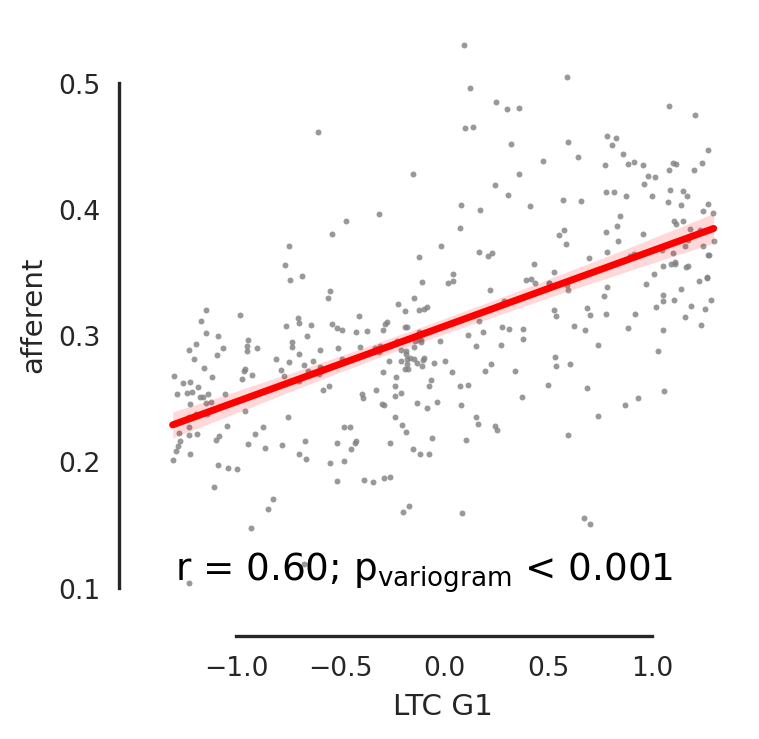

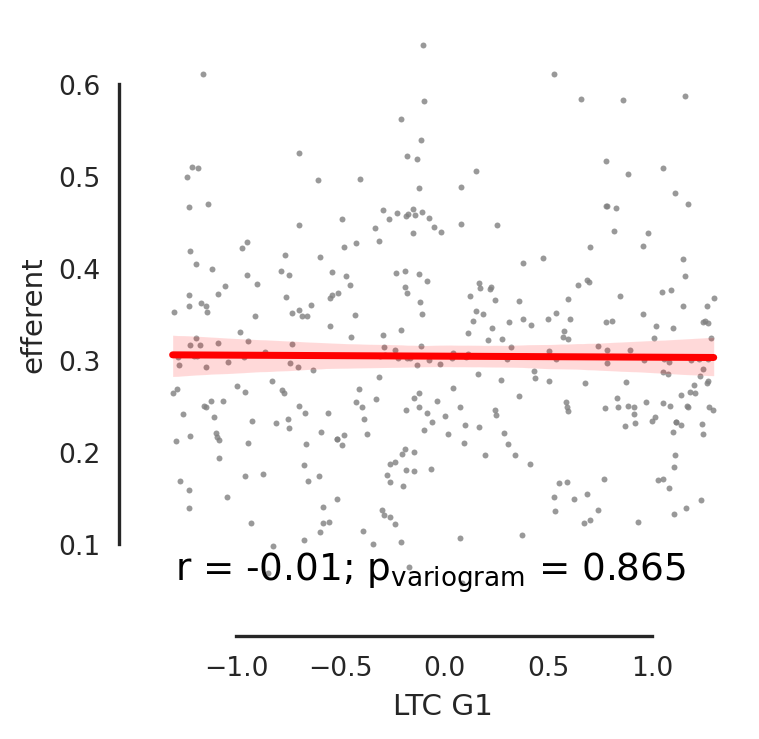

In [7]:
ltcg.correlate(ec_maps, x_columns=['LTC G1'], y_columns=['afferent', 'efferent'], barplot=False)